In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.1 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 6.6 MB 46.2 MB/s 
     |████████████████████████████████| 596 kB 52.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline

## Importing needed libraries

In [ ]:
from transformers import AutoConfig, AutoTokenizer, TFAutoModel

PARSBERT = "HooshvareLab/bert-base-parsbert-uncased"
config = AutoConfig.from_pretrained(PARSBERT)
tokenizer = AutoTokenizer.from_pretrained(PARSBERT)
model = TFAutoModel.from_pretrained(PARSBERT)

text = "ما در هوشواره معتقدیم با انتقال صحیح دانش و آگاهی، همه افراد می‌توانند از ابزارهای هوشمند استفاده کنند. شعار ما هوش مصنوعی برای همه است."

tokenizer.tokenize(text)

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/919M [00:00<?, ?B/s]

Some layers from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


['ما',
 'در',
 'هوش',
 '##واره',
 'معتقدیم',
 'با',
 'انتقال',
 'صحیح',
 'دانش',
 'و',
 'اگاهی',
 '،',
 'همه',
 'افراد',
 'میتوانند',
 'از',
 'ابزارهای',
 'هوشمند',
 'استفاده',
 'کنند',
 '.',
 'شعار',
 'ما',
 'هوش',
 'مصنوعی',
 'برای',
 'همه',
 'است',
 '.']

In [ ]:
import random 
import numpy as np
import nltk
import pandas as pd
import codecs
import tqdm

In [ ]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 5.0 MB/s 
     |████████████████████████████████| 233 kB 48.2 MB/s 
     |████████████████████████████████| 1.4 MB 42.9 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=c39a1bd9dbf3db5bee3471115100f25da610eb2be52bc06ec90720efde26822d
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=153857 sha256=fb1ec115959e3e8e52f89007afce68bd06b8819ee7998d37c36301d6f933628f
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from __future__ import unicode_literals
from hazm import *
import string
normalizer = Normalizer()


Here we implemented our own normalizer. This normalizer converts each half-space into a space as it is more compatible to our model.

In [ ]:
text = "پس از سال‌‌ها تلاش رازی موفق به کشف الکل شد. این دانشمند ایرانی باعث افتخار در تاریخ کور است."

def normalize_input(inp: str):
  inp_splitted =  inp.strip().split()
  inp_with_halfspace = normalizer.normalize(" ".join(inp_splitted))
  inp_without_halfspace = inp_with_halfspace.replace("\u200c", " ")
  for ch in string.punctuation:
    inp_without_halfspace = inp_without_halfspace.replace(ch, " "+ ch + " ")
  words_list = [word.strip() for word in inp_without_halfspace.split()]
  # words_list.remove("ها")
  normalized = " ".join(words_list)
  return normalized
normalize_input(text)

'پس از سال ها تلاش رازی موفق به کشف الکل شد . این دانشمند ایرانی باعث افتخار در تاریخ کور است .'

Here we download the pre-trained parsbert Model. We used the fill mask mode as it can help us to predict the unknown words in a sentence.


In [ ]:
model = pipeline('fill-mask', model=PARSBERT)

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


These two functions receive an index and change the value of the word with that index in the sentence to "[MASK]" token.

In [ ]:
def tester(sent, ind):
    words = sent.strip().split()
    response = dict()
    prev_len = sent.find(words[ind])
    response["raw"] = words[ind] 
    response["correct"] = None
    last_index = prev_len + len(words[ind]) 
    response["span"] = [prev_len, last_index]
    return response, ' '.join(words[:ind] + ["[MASK]"] + words[ind+1:])

def count_spaces_between(sent, last_index):
    count = 0
    if len(sent) <= last_index + 1:
        return count
    for ch in sent[last_index+1:]:
        if ch in string.whitespace:
            count += 1
        else:
          if(sent[len(sent)-1] in string.whitespace):
            return count - 1
          else:
            return count

This function only removes the ## in the tokens related that are tokenized by the bert model's tokenizer.

In [ ]:
def attach(tokenized):
  string = ""
  for token in tokenized:
    if token[:2] == "##":
      string += token[2:]
    else:
      string += " " + token
  return string

In [ ]:
!pip install gensim -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim # we only used it for finding levenshtein similarity between two words.

This function finds the word with minimum edit distance and maximum score.

In [ ]:
def get_recommended_word(word, predictions):
  min_dist = 1000
  predicted = predictions[0]
  for potential in predictions:
      distance = gensim.similarities.fastss.editdist(potential, word)
      if distance == 1:
        return potential
      if distance < min_dist:
        min_dist = distance
        predicted = potential
  return predicted

It detects if the input word is in the corpus of the bert model.

In [ ]:
def is_true(resp, input_str, max_threshold = 1500):
  tokenized = tokenizer.tokenize(input_str)
  attached = attach(tokenized)
  preds = model(attached, top_k = max_threshold)
  preds_str = [pred["token_str"] for pred in preds]
  num_of_occurence = -1
  if resp["raw"] in preds_str:
    num_of_occurence = preds_str.index(resp["raw"])
  return resp["raw"] in preds_str, num_of_occurence, preds_str


This function loops over the words in each sentence and uses the two previouse functions to find out if the word has a correct spelling.

In [ ]:
def evaluate(sent):
  sent = normalize_input(sent)
  print("The input sentence: ", sent)
  text_arr = sent.split()
  for ind in range(len(text_arr)):
    print(sent)
    resp, input_str = tester(sent, ind)
    if resp["raw"] == "ها":
      continue;
    is_valid, num_of_occurence, predictions = is_true(resp, input_str)
    if is_valid:
      print("the word ", resp["raw"], " is true! and occured in number ", num_of_occurence)
    else:
      print("the word ", resp["raw"], "is false!")
      recom_word = get_recommended_word(resp["raw"], predictions)
      print(" we recommed you to use the word", recom_word)
      text_arr[ind] = recom_word
      print("other predictions: ", predictions)
      text = ' '.join(text_arr)  
    print("-"*50)

In [ ]:
text = "بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیح نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد."
text = normalize_input(text)
evaluate(text)

The input sentence:  بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیح نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیح نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  بسیاری  is true! and occured in number  0
--------------------------------------------------
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیح نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  از  is true! and occured in number  0
--------------------------------------------------
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیح نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  مباحث  is true! and occured in number  56
--------------------------------------------------
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیح نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  علوم  is true! and occured in number  0
----

## Improvment of the previous approach!

Here we use the dataset of political sentences which was preprocessed previously. We used the first 1 hundred sentencess in the dataset to train model. For each word, we deleted one alphabet to created a misspelled word and left the rest of the sentence the same. After that, we used the bert model to find the potential words that could be replaced with the misspelled word. Finally, we used the score and editing distance of each word and its score to train our MLP(multi layer perceptron) model. The accuracy of our model is 82% 

In [ ]:
from random import shuffle
def process_mins(min_dist_words, min_edit_distances, min_dist_scores, correct_word, preds_str, edit_distances, preds_scores):
  data = []
  words = []
  output = 0
  if correct_word in preds_str:
    correct_ind = preds_str.index(correct_word)
    data.append((edit_distances[correct_ind], preds_scores[correct_ind]))
    words.append(correct_word)
  else:
    return None, -1, None
  for i in range(5):
    if(min_dist_words[i] != correct_word):
      data.append((min_edit_distances[i], min_dist_scores[i]))
      words.append(min_dist_words[i])
      if len(data) == 5:
        break
  temp = list(range(5))
  shuffle(temp)
  final_data = []
  final_words = []
  for ind, i in enumerate(temp):
    final_data.append(data[i])
    final_words.append(words[i])
    if i == 0:
      output = ind
  return final_data, output, final_words
  


In [ ]:
def create_variation(word: str):
  rand = random.randint(0, len(word)-1)
  variation = word[:rand] + word[rand+1:]
  return variation

def get_probabilities(text, model, max_threshold = 1500):
  text_arr = text.split()
  results = []
  outputs = []
  for ind in range(len(text_arr)):
    correct_word = text_arr[ind]
    variate = create_variation(correct_word)
    resp, input_str = tester(text, ind)
    print(resp, variate)
    if resp["raw"] == "ها":
      continue
    tokenized = tokenizer.tokenize(input_str)
    attached = attach(tokenized)
    preds = model(attached, top_k = max_threshold)
    preds_scores = [pred["score"] for pred in preds]
    preds_str = [pred["token_str"] for pred in preds]
    edit_distances = [gensim.similarities.fastss.editdist(variate, pred_str) for pred_str in preds_str]
    min_dist_words = np.array(preds_str)[np.array(edit_distances).argsort()[:5]]
    min_dist_scores = np.array(preds_scores)[np.array(edit_distances).argsort()[:5]]
    min_edit_distances = np.array(edit_distances)[np.array(edit_distances).argsort()[:5]]
    print("the nearest: ", min_dist_words[0])
    data, output, words = process_mins(min_dist_words, min_edit_distances, min_dist_scores, correct_word, preds_str, edit_distances, preds_scores)
    if output != -1:
      results.append(data)
      outputs.append(output)
    print("-"*30)
  return results, outputs


In [ ]:
def create_dataset(hundred_sent, model, max_threshold=1500):
  x = []
  y = []
  for sent in hundred_sent:
    sent = normalize_input(sent)
    results, outputs = get_probabilities(sent, model, max_threshold)
    x = x + results
    y = y + outputs

  return np.array(x), np.array(y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tqdm.notebook import tqdm
path_to_data = "/content/drive/MyDrive/Arshad/NLP/HW3-TransformersDataset/"
sports_tokens_repeatitive = [x.strip().split() for x in tqdm(codecs.open(path_to_data + 'sports_tokenized.txt','rU','utf-8').readlines())]
print(sports_tokens_repeatitive[:100])

  0%|          | 0/3277026 [00:00<?, ?it/s]

[['شاید', 'کمتر\u200cکسی', 'تصور', 'می\u200cکرد', 'روزی', 'رابطه', 'ایران', 'با', 'جمهوری', 'آذربایجان', 'از', 'لحاظ', 'دیپلماتیک', 'شکرآب', 'شود', '؛', 'اگرچه', 'هنوز', 'چنین', 'موضوعی', 'به\u200cصورت', 'قطعی', 'رخ', 'نداده', 'ولی', 'نشانه\u200cهایی', 'در', 'میان', 'است', 'که', 'به', 'نظر', 'می\u200cرسد', 'رفته\u200cرفته', 'چنین', 'شود', '.'], ['شروعش', 'فعلا', 'از', 'سوی', 'رئیس\u200cجمهور', 'آذربایجان', 'بوده_است', '؛', 'الهام', 'علی\u200cاف', '،', 'اخیرا', 'در', 'گفت\u200cوگو', 'با', 'یک', 'رسانه', 'ترکیه\u200cای', 'درباره', 'ادعای', 'ورود', '۶۰', 'کامیون', 'ایرانی', 'به', 'منطقه', 'قره\u200cباغ', 'در', 'تابستان', 'امسال', 'گفته_است', 'که', '«', 'این', 'اولین', 'باری', 'نیست', 'که', 'کامیون\u200cهای', 'ایرانی', 'به\u200cصورت', 'غیرقانونی', 'به', 'منطقه', 'قره\u200cباغ', 'سفر', 'می\u200cکنند', '.'], ['این', 'چیزی', 'است', 'که', 'به\u200cطور', 'مداوم', 'در', 'جریان', 'دوران', 'اشغال', '[', 'قره\u200cباغ', 'توسط', 'ارمنستان', ']', 'رخ', 'می\u200cداده', 'است', '»', '.'], ['او', 'گفته_ا

In [ ]:
sports_tokens_100 = sports_tokens_repeatitive[:100]
del sports_tokens_repeatitive

In [ ]:
hund_sentences = []
for sent in sports_tokens_100:
  hund_sentences.append(normalize_input(" ".join(sent)))

In [ ]:
x, y = create_dataset(hund_sentences, model)

In [ ]:
len(x)
len(y)

2651

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
X = np.array([temp.flatten() for temp in x])
X[:, [0,2,4,6,8]] = X[:, [0,2,4,6,8]].astype(int)
y = to_categorical(y).astype(int)

In [ ]:
Y = y.astype(int)

In [ ]:
Y[0]

array([0, 0, 0, 1, 0])

Here we Train our model using the Features(Bert score and Editing distance of potential substitutes).

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8280542986425339

In [ ]:
def mlp_evaluate(text, model, max_threshold = 1500):
  text_arr = text.split()
  results = []
  outputs = []
  for ind in range(len(text_arr)):
    print(text)
    correct_word = text_arr[ind]
    resp, input_str = tester(text, ind)
    if resp["raw"] == "ها":
      continue
    tokenized = tokenizer.tokenize(input_str)
    attached = attach(tokenized)
    preds = model(attached, top_k = max_threshold)
    preds_scores = [pred["score"] for pred in preds]
    preds_str = [pred["token_str"] for pred in preds]
    edit_distances = [gensim.similarities.fastss.editdist(correct_word, pred_str) for pred_str in preds_str]
    min_dist_words = np.array(preds_str)[np.array(edit_distances).argsort()[:5]]
    min_dist_scores = np.array(preds_scores)[np.array(edit_distances).argsort()[:5]]
    min_edit_distances = np.array(edit_distances)[np.array(edit_distances).argsort()[:5]]
    model_input = []
    for dist, score in zip(min_edit_distances, min_dist_scores):
      model_input.append(dist)
      model_input.append(score)
    model_input = np.array([model_input])
    model_input[:,[0, 2, 4, 6, 8]] = model_input[:,[0, 2, 4, 6, 8]].astype(int)
    model_output = clf.predict(model_input)
    if min_dist_words[model_output.argmax()] == correct_word:
      print("the word ", correct_word, "is correct!")
    else:
      print("the word ", correct_word, "is not correct!")
      print("we recommend you to use "+ min_dist_words[model_output.argmax()]+ " instead!")
      print("other words: ")
      print(min_dist_words)
    print("-"*30)
  return results, outputs


In [ ]:
text = "بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیه نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد."
text = normalize_input(text)
mlp_evaluate(text, model)

بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیه نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  بسیاری is correct!
------------------------------
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیه نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  از is correct!
------------------------------
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیه نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  مباحث is correct!
------------------------------
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیه نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  علوم is correct!
------------------------------
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیه نیست و برای یادگیری باید به فلسفه های خاصی رجو کرد .
the word  غیرطبیعی is correct!
------------------------------
بسیاری از مباحث علوم غیرطبیعی با استفاده از فیزیک دنیای مادی ابل توجیه نیست و برای یا

([], [])

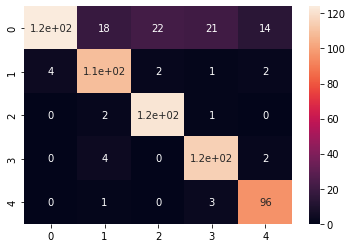

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(clf.predict(X_test).argmax(axis = 1), y_test.argmax(axis=1))
ax = sns.heatmap(conf_mat, annot=True)

The high numbers in the diagonal part of the confusion matrix shows that our model is trained properly. These results have been acquired using test set!
